In [ ]:
!pip install wget

In [70]:
import pandas as pd
import wget
from zipfile import ZipFile
import statistics

In [71]:
url = 'http://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/DFP/DADOS/'
pathout = '/content/balanco/'
pathoutcsv = '/content/csv/'
anoInicial = 2010

In [72]:
arquivos = []
for ano in range(anoInicial,2021):
    arquivos.append(f'dfp_cia_aberta_{ano}.zip')

In [73]:
arquivos

['dfp_cia_aberta_2010.zip',
 'dfp_cia_aberta_2011.zip',
 'dfp_cia_aberta_2012.zip',
 'dfp_cia_aberta_2013.zip',
 'dfp_cia_aberta_2014.zip',
 'dfp_cia_aberta_2015.zip',
 'dfp_cia_aberta_2016.zip',
 'dfp_cia_aberta_2017.zip',
 'dfp_cia_aberta_2018.zip',
 'dfp_cia_aberta_2019.zip',
 'dfp_cia_aberta_2020.zip']

In [74]:
#baixar os arquivos de balanço
for arq in arquivos:
    wget.download(url+arq, out=pathout)

In [75]:
#extrair os arquivos zipados
for arq in arquivos:
    ZipFile(pathout + arq, 'r').extractall(pathoutcsv)

In [76]:
#ler DRE (demostração de resultados do exercício)
data = pd.DataFrame()
for ano in range(anoInicial,2021):
    data = pd.concat([data, pd.read_csv(pathoutcsv+f'dfp_cia_aberta_DRE_con_{ano}.csv', sep=';', decimal=',', encoding='ISO-8859-1')])

In [77]:
data = data[data['DS_CONTA'].str.contains('Lucro') & data['DS_CONTA'].str.contains('Prejuízo') & data['DS_CONTA'].str.contains('Consolidado')]
data = data[data['ORDEM_EXERC'] == 'ÚLTIMO']

In [78]:
data = data.drop(columns=['CNPJ_CIA', 'DT_REFER', 'VERSAO', 'CD_CVM', 'GRUPO_DFP', 'MOEDA', 'ESCALA_MOEDA',
                          'CD_CONTA', 'ST_CONTA_FIXA'])

In [79]:
stock = data[data['DENOM_CIA'] == 'BCO BRASIL S.A.']
stock

,DENOM_CIA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,DS_CONTA,VL_CONTA
63,BCO BRASIL S.A.,ÚLTIMO,2010-01-01,2010-12-31,Lucro/Prejuízo Consolidado do Período,11330345.0000000000
63,BCO BRASIL S.A.,ÚLTIMO,2011-01-01,2011-12-31,Lucro/Prejuízo Consolidado do Período,12736912.0000000000
65,BCO BRASIL S.A.,ÚLTIMO,2012-01-01,2012-12-31,Lucro/Prejuízo Consolidado do Período,11438200.0000000000
67,BCO BRASIL S.A.,ÚLTIMO,2013-01-01,2013-12-31,Lucro/Prejuízo Consolidado do Período,11288834.0000000000
67,BCO BRASIL S.A.,ÚLTIMO,2014-01-01,2014-12-31,Lucro/Prejuízo Consolidado do Período,13343496.0000000000
67,BCO BRASIL S.A.,ÚLTIMO,2015-01-01,2015-12-31,Lucro/Prejuízo Consolidado do Período,15798039.0000000000
67,BCO BRASIL S.A.,ÚLTIMO,2016-01-01,2016-12-31,Lucro/Prejuízo Consolidado do Período,8659577.0000000000
67,BCO BRASIL S.A.,ÚLTIMO,2017-01-01,2017-12-31,Lucro/Prejuízo Consolidado do Período,12275303.0000000000
71,BCO BRASIL S.A.,ÚLTIMO,2018-01-01,2018-12-31,Lucro/Prejuízo Consolidado do Período,15086101.0000000000
71,BCO BRASIL S.A.,ÚLTIMO,2019-01-01,2019-12-31,Lucro/Prejuízo Consolidado do Período,18888318.0000000000


In [80]:
ll = []
for i in stock['VL_CONTA']:
    if(float(i) != 0):
        ll.append(float(i))

In [81]:
lucrodf = pd.DataFrame(ll,columns=['lucro'])

In [85]:
lucrodf

,lucro
0,11330345.0
1,12736912.0
2,11438200.0
3,11288834.0
4,13343496.0
5,15798039.0
6,8659577.0
7,12275303.0
8,15086101.0
9,18888318.0


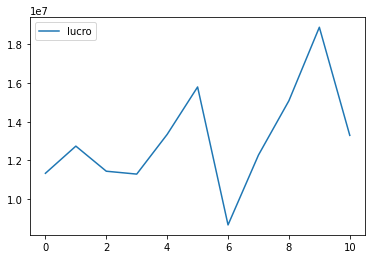

In [84]:
pd.DataFrame(lucrodf).plot()